 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#K-近邻算法" data-toc-modified-id="K-近邻算法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>K-近邻算法</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#kNN-概述" data-toc-modified-id="kNN-概述-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><code>kNN</code> 概述</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#构建kNN.py" data-toc-modified-id="构建kNN.py-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>构建<code>kNN.py</code></a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#kNN改进约会网站的配对效果" data-toc-modified-id="kNN改进约会网站的配对效果-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>kNN</code>改进约会网站的配对效果</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#准备数据" data-toc-modified-id="准备数据-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>准备数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#数据展示" data-toc-modified-id="数据展示-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>数据展示</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#数据准备：归一化" data-toc-modified-id="数据准备：归一化-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>数据准备：归一化</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#测试算法" data-toc-modified-id="测试算法-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>测试算法</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#使用算法" data-toc-modified-id="使用算法-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>使用算法</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#示例：手写识别系统" data-toc-modified-id="示例：手写识别系统-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>示例：手写识别系统</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#准备数据" data-toc-modified-id="准备数据-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>准备数据</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#测试算法" data-toc-modified-id="测试算法-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>测试算法</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#自实现" data-toc-modified-id="自实现-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>自实现</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#书本实现" data-toc-modified-id="书本实现-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>书本实现</a></span></li></ul></li></ul></li></ul></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#问题点：" data-toc-modified-id="问题点：-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>问题点：</a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#盐" data-toc-modified-id="盐-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>盐</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#axis" data-toc-modified-id="axis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><code>axis</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#np.tile" data-toc-modified-id="np.tile-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><code>np.tile</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#np.argsort()" data-toc-modified-id="np.argsort()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><code>np.argsort()</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#dic.get(key,-0)" data-toc-modified-id="dic.get(key,-0)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span><code>dic.get(key, 0)</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#string.stripe()" data-toc-modified-id="string.stripe()-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><code>string.stripe()</code></a></span></li><li><span><a href="http://localhost:8888/notebooks/01_Books/05_Machine%20Learning%20in%20Action/%E7%AC%AC%E4%BA%8C%E7%AB%A0%20K-%E8%BF%91%E9%82%BB%E7%AE%97%E6%B3%95.ipynb#sting.split()" data-toc-modified-id="sting.split()-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span><code>sting.split()</code></a></span></li></ul></li></ul></div>

# K-近邻算法

In [139]:
import numpy as np
import pandas as pd
import operator

In [34]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
# rcParams['axes.edgecolor']='white'
# rcParams['xtick.color']='black'
# rcParams['ytick.color']='black'
# rcParams['axes.labelcolor']='black'
# rcParams['text.color']='black'
# rcParams['figure.edgecolor']=(1, 1, 1, 1)
#rcParams['figure.facecolor']=(1, 1, 1, 1)
rcParams['font.family']='simhei'
#rcParams['font.size']=13

## `kNN` 概述 

### 构建`kNN.py`

In [4]:
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A', 'A','B', 'B']
    return group, labels

In [7]:
group, labels = createDataSet()

In [12]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [13]:
group.shape

(4, 2)

In [175]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, [dataSetSize, 1]) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()  #从小到大排序，返回对应的index
    
    classCount ={}
    for i in range(k):
        voteILabel = labels[sortedDistIndicies[i]]
        classCount[voteILabel] = classCount.get(voteILabel, 0) + 1  
        #get方法，未get到key时返回第二个参数，即0，用来对列表中元素计数并返回字典
    
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)   
    #python3中dic.items()返回迭代器, sorted也是从小到大排列，用reverse翻转
    
    return sortedClassCount[0][0]

In [21]:
classify0([1.2,1.2],group, labels, 3)

'A'

## `kNN`改进约会网站的配对效果

### 准备数据

In [15]:
def file2matix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines()  #按行读取文件，并返回一个列表，每个元素是一行
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    
    index=0
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[:3]  #索引从0开始，不包含3
        classLabelVector.append(int(listFromLine[-1]))
        index +=1
        
    return returnMat, classLabelVector

In [16]:
datingDataMat, datingLabels = file2matix('data/chp02/datingTestSet2.txt')

In [17]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

### 数据展示

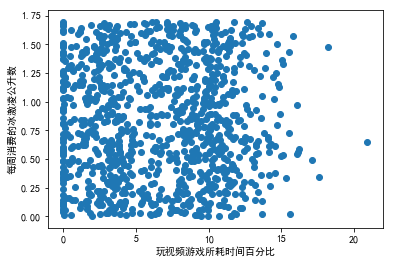

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰激凌公升数')
plt.show()

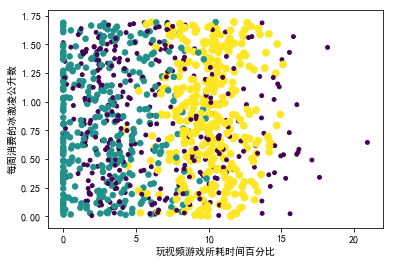

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,1], datingDataMat[:,2],s=15.0*np.array(datingLabels),c=5.0*np.array(datingLabels))
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰激凌公升数')
plt.savefig('test.png',dpi=600)
plt.show()

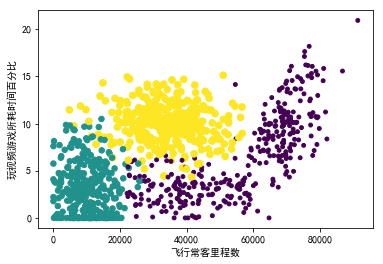

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDataMat[:,0], datingDataMat[:,1],s=15.0*np.array(datingLabels),c=25.0*np.array(datingLabels))
plt.xlabel('飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.show()

In [62]:
class1= datingDataMat[np.array(datingLabels)==1]
class2= datingDataMat[np.array(datingLabels)==2]
class3= datingDataMat[np.array(datingLabels)==3]

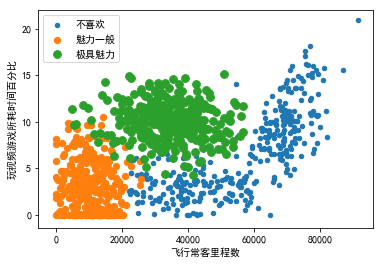

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(class1[:,0],class1[:,1], s=20)
ax.scatter(class2[:,0],class2[:,1], s=40)
ax.scatter(class3[:,0],class3[:,1], s=60)
plt.xlabel('飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.legend(['不喜欢','魅力一般','极具魅力'], loc='upper left')
plt.show()

### 数据准备：归一化

In [72]:
def autoNorm(dataSet):
    minVals = dataSet.min(axis=0)
    maxVals = dataSet.max(axis=0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(dataSet.shape)
    m =dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet / np.tile(ranges, (m,1))
    
    return normDataSet, ranges, minVals

In [73]:
normDat, ranges, minVals = autoNorm(datingDataMat)

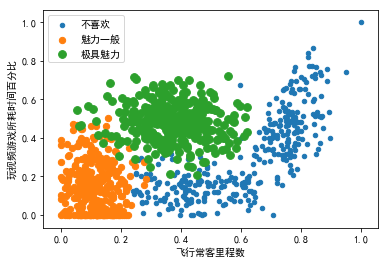

In [135]:
class1= normDat[np.array(datingLabels)==1]
class2= normDat[np.array(datingLabels)==2]
class3= normDat[np.array(datingLabels)==3]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(class1[:,0],class1[:,1], s=20)
ax.scatter(class2[:,0],class2[:,1], s=40)
ax.scatter(class3[:,0],class3[:,1], s=60)
plt.xlabel('飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.legend(['不喜欢','魅力一般','极具魅力'], loc='upper left')
plt.show()

In [138]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

### 测试算法

In [130]:
def datingClassTest(hoRatio,k):
    """hoRatio：测试集比例，k：邻近个数"""
    datingDataMat, datingLabels = file2matix('data/chp02/datingTestSet2.txt')
    normDat, ranges, minVals = autoNorm(datingDataMat)
    m =datingDataMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    
    for i in range(numTestVecs):
        classifierResult = classify0(normDat[i,:], normDat[numTestVecs:m,:], datingLabels[numTestVecs:m], k)
        #print("the classifier came back with: %d, the real answer is %d" %(classifierResult, datingLabels[i]))
        
        if classifierResult != datingLabels[i]:
            errorCount += 1.0
            
    #print('the total error rate is %f' %(errorCount/float(numTestVecs)))
    return errorCount/float(numTestVecs)

In [128]:
datingClassTest(0.10,4)

0.03

In [123]:
errorList=[]
for k in range(1,50):
    error = datingClassTest(0.10,k)
    errorList.append(error)

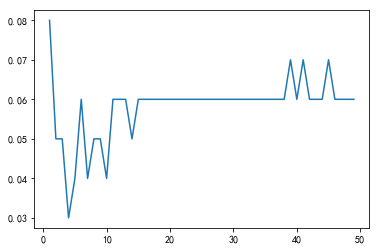

In [125]:
plt.plot(range(1,50), errorList)
plt.show()

### 使用算法

In [132]:
def classfyperson():
    resultList = ['not at all', 'in small doess', 'in large doese']
    percentaTats = float(input("pencentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    
    datingDataMat, datingLabels = file2matix('data/chp02/datingTestSet2.txt')
    normDat, ranges, minVals = autoNorm(datingDataMat)
    
    inArr = [percentaTats, ffMiles, iceCream]
    classifierResult = classify0((inArr - minVals)/ranges, normDat, datingLabels, 3)
    print('you will propably like this person:', resultList[classifierResult - 1])

In [133]:
classfyperson()

pencentage of time spent playing video games?10
frequent flier miles earned per year10000
liters of ice cream consumed per year?0.5
you will propably like this person: not at all


## 示例：手写识别系统

### 准备数据

In [149]:
def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [154]:
testVector = img2vector('data/chp02/digits/trainingDigits/0_13.txt')
testVector[0,32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 测试算法

#### 自实现

In [155]:
from os import listdir

In [195]:
def handwritingClassTest():
    
    train_pre_path = 'data/chp02/digits/trainingDigits'
    test_pre_path = 'data/chp02/digits/testDigits'
    
    train_fn = listdir(train_pre_path)
    test_fn = listdir(test_pre_path)
    n_test = len(test_fn)
    n_train = len(train_fn)
    
    train_mat = np.zeros([n_train, 1024])
    train_labels = []
    
    for i in range(n_train):
        train_vector = img2vector(train_pre_path + '/'+ train_fn[i])
        train_labels.append(int(train_fn[i][0]))
        train_mat[i,:] = train_vector     
    
    error_count = 0
    
    for j in range(n_test):
        test_vector = img2vector(test_pre_path +'/' + test_fn[j])
        test_label = int(test_fn[j][0])
        
        classifier_result = classify0(test_vector, train_mat, train_labels, 3)
        
        if classifier_result!=test_label:
            error_count +=1

#         print('the claassifier came back with %d, the real answer is : %d' %(classifier_result, test_label)) 
        
    print("test number:", n_test)
    print("total error num:", error_count)
    print("error ratio:", error_count/n_test)

In [196]:
handwritingClassTest()

test number: 946
total error num: 11
error ratio: 0.011627906976744186


#### 书本实现

In [205]:
def handwritingClassTest2():
    hwLabels = []
    trainingFileList = listdir('data/chp02/digits/trainingDigits')
    m =len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    
    for i in range(m):
        filenameStr = trainingFileList[i]
        fileStr = filenameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('data/chp02/digits/trainingDigits/%s' %filenameStr)
        
    testFileList =listdir('data/chp02/digits/testDigits')
    errorCount =0.0
    mTest = len(testFileList)
    for i in range(mTest):
        filenameStr = testFileList[i]
        fileStr = filenameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vetorUnderTest = img2vector('data/chp02/digits/testDigits/%s' %filenameStr)
        classifierResult = classify0(vetorUnderTest, trainingMat, hwLabels, 3)
        
#         print('the claassifier came back with %d, the real answer is : %d' %(classifierResult, classNumStr))
        if (classifierResult!=classNumStr): errorCount+=1.0
    print("test number:", mTest)
    print("total error num:", errorCount)
    print("error ratio:", errorCount/mTest)

In [206]:
handwritingClassTest2()

test number: 946
total error num: 11.0
error ratio: 0.011627906976744186


# 问题点：
- numpy矩阵行列问题
- 取1列，取1行的方法

# 盐

## `axis`
- `axis=0` down:跨行操作
- `axis=1` cross:跨列操作

## `np.tile` 
- 将一个列表按给定的方式拓展（[doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html)）

## `np.argsort()`
- 从小到大排序，返回排序后的“原”索引（[doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html)）

## `dic.get(key, 0)`
- 未`get` 到key时，返回第二个参数，常用来对列表中的元素计数，并返回字典形式|


## `string.stripe()`
- `strip` is a method that eliminates specific characters from the beginning and the end of a string. 
- By default, it removes any white space characters, such as spaces, tabs and new line characters.

## `sting.split()`
- 按指定的符号分割字符串，并返回列表（[doc](http://www.tutorialspoint.com/python/string_split.htm)）